<a href="https://colab.research.google.com/github/gracebiro/TP4/blob/main/ML_TP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import urllib.request
import pandas as pd
from io import StringIO


def get_melbourne_data() -> pd.DataFrame:
    '''
    Returns a dataframe of the melbourne data set.
    :return: pd.DataFrame
    '''

    # URL of the raw csv data to download
    raw_url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"

    # Get the earthquake data from the API
    response = urllib.request.urlopen(raw_url)

    # Decode earthquake data
    response = response.read().decode('utf-8')

    # Return as a pandas dataframe
    data = pd.read_csv(StringIO(response))

    # Cast the date column to datetime
    data['Date'] = pd.to_datetime(data['Date'])

    return data


def split_train_test_data(melbourne_data: pd.DataFrame, split_year: str="1991") -> (pd.DataFrame, pd.DataFrame):
    '''
    Split the melbourne data into a training dataframe and a test dataframe.
    The training data is composed of all temperature points strictly anterior to the given split year.
    The test data is composed of all the points posterior or equal to the split year.
    :param melbourne_data: pd.DataFrame, with at least column ['Date']
    :param split_year: str, the year to split the data on
    :return: (pd.DataFrame, pd.DataFrame)
    '''

    # Format split year variable
    split_year = "{}".format(int(split_year) - 1)

    # Trainings data. Data anterior to the given split year
    train_data = melbourne_data.loc[:split_year]

    # Test data. Data posterior or equal to the given split year
    test_data = melbourne_data.loc[split_year:]

    return train_data, test_data


In [2]:
def test_get_melbourne_data():
    '''
    Test the get_melbourne_data function.
    '''
    # Get the data
    data = get_melbourne_data()
    # Check dataset is not empty
    return data


def test_split_train_test_data():
    '''
    Test the split_train_test_data function.
    '''
    # Get the data
    data = get_melbourne_data()
    # Split the data
    train, test = split_train_test_data(data, split_year="1991")
    # Check the train and test data are not empty
    return train, test

In [3]:
df=test_get_melbourne_data()
df

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


In [4]:
Y=df.iloc[len(df)-365:,:]
X=df.iloc[:len(df)-365,:]

In [5]:
len(X)

3285

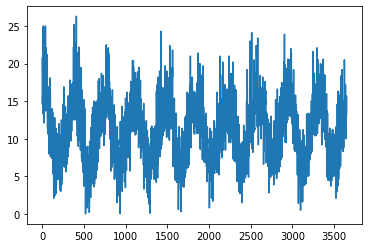

In [6]:
import matplotlib.pyplot as plt

plt.plot(df.iloc[:,1:])
plt.show()

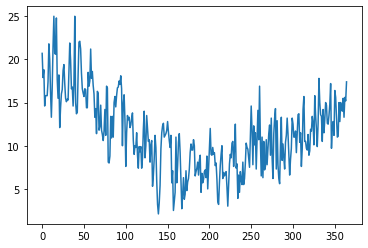

In [7]:
plt.plot(df.iloc[:365,1:])
plt.show()

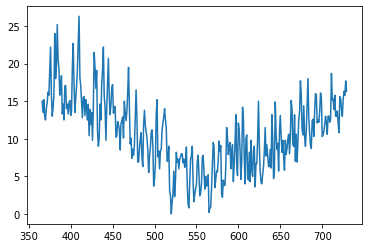

In [8]:
plt.plot(df.iloc[366:730,1:])
plt.show()

In [9]:
X.shape[0]


# import numpy as np
# np.reshape(np.arange(6),(3,2))
len(X.iloc[:,1:].to_numpy())
X_1=[]
for i in range(len(X.iloc[:,1:].to_numpy())):
    X_1.append(X.iloc[:,1:].to_numpy()[i][0])
len(X_1)

3285

## Function that take a series and transform it to a dataset of shape(None,time steps, features)

In [10]:
from pandas import DataFrame
from pandas import concat

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
        data: Sequence of observations as a list or NumPy array.
        n_in: Number of lag observations as input (X).
        n_out: Number of observations as output (y).
        dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [11]:
X=series_to_supervised(X_1, n_in=365, n_out=365, dropnan=True)

In [12]:
X.to_numpy().shape[0]

2556

In [13]:
import numpy as np

# reshape input to be [samples, time steps, features]
trainX = np.reshape(X.to_numpy(), (X.to_numpy().shape[0], 2,365))


In [14]:
trainX.shape

(2556, 2, 365)

In [15]:
len(trainX.reshape(2556,-1))

2556

In [16]:
len(trainX[0])

2

In [17]:
X_train=[]
Y_train=[]

for i in range(len(trainX)):
  X_train.append(trainX[i][0])
  Y_train.append(trainX[i][1])


In [18]:
len(X_train),len(X_train[0])
X_train[0][364]

17.4

In [19]:
len(Y_train)

2556

In [20]:
np.arange(6).reshape(2,3)

array([[0, 1, 2],
       [3, 4, 5]])

In [21]:
from keras.layers import Input, LSTM, Dense
from keras.models import Sequential,Model
np.array(X_train).shape

(2556, 365)

In [22]:
model_input=Input(shape=(365,1))

# model=Sequential()

# model.add(LSTM(4, input_shape=(365,1)))
# model.add(Dense(365))
# model.compile(loss='mse', optimizer='adam')
# model.fit(X_train, Y_train, epochs=100, batch_size=1,verbose=2)

z1=LSTM(8,activation='relu', name='x')(model_input)

y=Dense(1,activation='linear', name='Dense')(z1)

model_keras=Model(inputs=model_input, outputs=y)

model_keras.compile(optimizer='adam', loss='mse')

model_keras.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 365, 1)]          0         
                                                                 
 x (LSTM)                    (None, 8)                 320       
                                                                 
 Dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 329
Trainable params: 329
Non-trainable params: 0
_________________________________________________________________


In [23]:
# from keras.layers import Input, LSTM, Dense
# from keras.models import Sequential,Model
# import tensorflow as tf

# model = Sequential()  

# model.add(LSTM(128, input_shape=(X_train.shape[1:]), activation="relu", return_sequences=True))  

# model.add(LSTM(128, activation="relu"))  

# model.add(Dense(128, activation="relu")) 

# model.add(Dense(10, activation="softmax"))
# opt=tf.keras.optimizers.Adam(lr=1e-3, decay=1e-5)

# model.compile(loss=tf.keras.metrics.sparse_categorical_crossentropy,
#               optimizer=opt, 
#               metrics=['accuracy'])

In [24]:
model_keras.fit(np.array(X_train), np.array(Y_train), batch_size=64, epochs=10)

Epoch 1/10
40/40 [==============================] - 6s 114ms/step - loss: 105.6229
Epoch 2/10
40/40 [==============================] - 5s 112ms/step - loss: 63.1498
Epoch 3/10
40/40 [==============================] - 5s 113ms/step - loss: 22.7226
Epoch 4/10
40/40 [==============================] - 5s 114ms/step - loss: 16.6164
Epoch 5/10
40/40 [==============================] - 5s 113ms/step - loss: 16.3505
Epoch 6/10
40/40 [==============================] - 6s 155ms/step - loss: 16.2440
Epoch 7/10
40/40 [==============================] - 4s 113ms/step - loss: 16.1725
Epoch 8/10
40/40 [==============================] - 4s 111ms/step - loss: 16.1208
Epoch 9/10
40/40 [==============================] - 4s 112ms/step - loss: 16.0719
Epoch 10/10
40/40 [==============================] - 4s 112ms/step - loss: 16.0279


In [25]:
y_pred=model_keras.predict(np.array(X_train))


In [26]:
np.array(Y_train).shape

(2556, 365)

array([[11.262521 ],
       [11.1536875],
       [10.813577 ],
       ...,
       [10.42585  ],
       [10.714017 ],
       [10.605171 ]], dtype=float32)

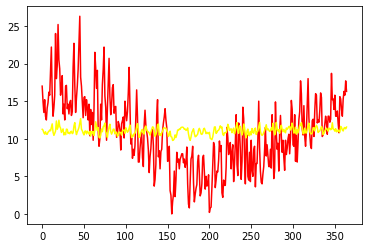

In [27]:
import matplotlib.pyplot as plt

plt.plot(Y_train[0], color='red')
plt.plot(y_pred[0:365], color='yellow')

y_pred

# ESGF Melbourne (dev)

## Data

Minimum daily temperatures over 10 years (1981-1990) in the city Melbourne, Australia.

![Daily temperature evolution](docs/pics/temperature_evolution.png "Daily Temperature Evolution")

## Objective

We want to build a model able to predict the **daily** temperature in Melbourne over the **next year**.

## Evaluation

Fit one or more models using the data strictly anterior to the evaluation years 
`t=1987`, `t=1988` and `t=1989` in order to predict the daily temperature 
during the year `t=1987`, `t=1988` and `t=1989` respectively.

### Results

Choose a suitable metric to evaluate the performance of your models. 
Report the metric in the following table. 

For each evaluation year `t`, you must report the performance considering `k=3`, `k=6` and `k=12` months of data following `t`.

<table>
    <thead>
        <tr>
            <th>Evaluation year</th>
            <th>Next 3 months</th>
            <th>Next 6 months</th>
            <th>Next 12 months</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>1987</td>
            <td></td>
            <td></td>
            <td></td>
        </tr>
        <tr>
            <td>1988</td>
            <td></td>
            <td></td>
            <td></td>
        </tr>
        <tr>
            <td>1989</td>
            <td></td>
            <td></td>
            <td></td>
        </tr>
    </tbody>
</table>